Name: Zhuoyuan Xu (Kallen)

NetID: zx1137

Due Date: April 1st, 2021

# Logistic Regression

**Problem 1**

For convenience of showing the expressions, we can define $y_i\in\{0,1\}$ and rewrite $Y_i\in\{-1,1\}$. The $y_i$ here can be transformed back to the space $Y=\{-1,1\}$ by expression $2y_i-1$. These 2 choices of $y_i$ will not affect the basic of the derivation.

Given a Bernoulli response distribution with $p(y=1 \mid x; w) = 1 / (1 + \exp(-x^Tw))$, assume the sample is i.i.d, then the MLE can be written as
$$\begin{split}w&=arg\max_{w}P(y_1,x_1,...,y_n,x_n|w)\\&=arg\max_{w}\Pi^n_{i=1}P(y_i|x_i,w)\\&=arg\max_{w}\Pi^n_{i=1}p(y = 1|x;w)^{y_i}(1-p(y = 1|x;w))^{1-y_i}\end{split}$$

Take the maximize log likelihood, note $\frac{1}{n}$ is positive,
$$\begin{split}w&=arg\max_{w}log\Pi^n_{i=1}p(y = 1|x;w)^{y_i}(1-p(y = 1|x;w))^{1-y_i}\\&=arg\max_{w}\frac{1}{n}\sum^n_{i=1}(y_ilog(p(y = 1|x;w))+(1-y_i)log(1-p(y = 1|x;w)))\\&=arg\max_{w}-\frac{1}{n}\sum^n_{i=1}(y_ilog(1+exp(-x_i^Tw))+(1-y_i)log(1+exp(x_i^Tw)))\\&=arg\max_{w}-\frac{1}{n}\sum^n_{i=1}(log(1+exp(-(2y_i-1)x_i^Tw)))\end{split}$$

Note since in the beginning, we refine the $y_i\in\{0,1\}$ and $y_i$ can be transformed into $Y\in\{-1,1\}$ by $2y_i-1$, we can now substitute $2y_i-1$ in the expression to $Y_i$, with $Y_i$ denoting the $Y$s in our dataset $D$.

The expression is now
$$\begin{split}w&=arg\max_{w}-\frac{1}{n}\sum^n_{i=1}(log(1+exp(-Y_ix_i^Tw)))\\&=arg\min_{w}\frac{1}{n}\sum^n_{i=1}(log(1+exp(-Y_ix_i^Tw)))\end{split}$$

The ERM with logistic loss is 
$$\begin{split}w&=arg\min_w\frac{1}{n}\sum^n_{i=1}(l_{logistic}(\hat{y_i},w),y_i)\\&=arg\min_{w}\frac{1}{n}\sum^n_{i=1}(log(1+exp(-Y_iw^Tx_i)))\end{split}$$

Therefore the 2 approaches have their objective of the minimization equivalent, and will product the same w with the same optimization algorithm.

**Problem 2**

Given $p(y=1 \mid x; w) = 1 / (1 + \exp(-x^Tw))$, For this problem we have $$\begin{split}P(Y=1|x)&=\frac{1}{1+exp(-x^Tw)}\\P(Y=-1|x)&=1-\frac{1}{1+exp(-x^Tw)}=\frac{exp(-x^Tw)}{1+exp(-x^Tw)}\end{split}$$

On the decision boundary of the prediction problem we will have $$\frac{P(Y=1|x)}{P(Y=-1|x)}=1$$which is equivalent to $P(Y=1|x)=\frac{1}{1+exp(-x^Tw)}=0.5$ or $$log(\frac{P(Y=1|x)}{P(Y=-1|x)})=0$$

$$log(\frac{\frac{1}{1+exp(-x^Tw)}}{\frac{exp(-x^Tw)}{1+exp(-x^Tw)}})=0$$
Note $1+exp(-x^Tw)$ will not equal to 0, then
$$\begin{split}log(exp(-x^Tw))&=0\\x^Tw&=0\end{split}$$

Therefore the boundary of seperating positive and negative is $\{x:x^Tw=0\}$

**Problem 3**

The likelihood function L of $c\hat{w}$ is
$$L(c\hat{w})=\Pi^n_{i=1}P(y_i|x_i,c\hat{w})$$
If we continue with the Bernoulli response with $p(y=1 \mid x; w) = 1 / (1 + \exp(-x^Tw))$, the likelihood function is going to be $$L(c\hat{w})=\Pi^n_{i=1}p(y = 1|x;c\hat{w})^{y_i}(1-p(y = 1|x;c\hat{w}))^{1-y_i}$$
Note the log is monotonically increasing and the likelihood is non-negative, to show the problem we can also take derivative of the log maximum likelihood
$$\begin{split}l(c\hat{w})&=\sum^n_{i=1}(y_ilog(\frac{1}{1+exp(-x_i^Tc\hat{w})})+(1-y_i)log(1-\frac{1}{1+exp(-x_i^Tc\hat{w})}))\\&=-\sum^n_{i=1}(y_ilog(1+exp(-x_i^Tc\hat{w}))+(1-y_i)log(1+exp(x_i^Tc\hat{w})))\\&=-\sum^n_{i=1}(log(1+exp(-(2y_i-1)x_i^Tc\hat{w})))\end{split}$$

We can take the derivative of $l(c\hat{w})$ with respect to c for a point $(x_i,y_i)$
$$\begin{split}\frac{\partial l(c\hat{w})}{\partial c}
&=-\sum^n_{i=1}(log(1+exp(-(2y_i-1)x_i^Tc\hat{w})))\\
&=\sum^n_{i=1}\frac{(2y_i-1)x_i^T\hat{w}exp(-(2y_i-1)x_i^Tc\hat{w})}{1+exp(-(2y_i-1)x_i^Tc\hat{w})}
\end{split}$$

In this expression, the $y_i$ is defined in $\{0,1\}$, so to transform to our definition of the $y$s in dataset D, we again use the expressions $Y_i\in\{-1,1\}$ and $Y_i=2y_i-1$

$$\begin{split}\frac{\partial l(c\hat{w})}{\partial c}=\sum^n_{i=1}\frac{Y_ix_i^T\hat{w}exp(-Y_ix_i^Tc\hat{w})}{1+exp(-Y_ix_i^Tc\hat{w})}\end{split}$$

Given that $\hat{w}$ classify all data correctly, $Y_ix_i^T\hat{w}>0$. Meanwhile, $\frac{exp(-Y_ix_i^Tc\hat{w})}{1+exp(-Y_ix_i^Tc\hat{w})}>0$

Therefore, $$\frac{\partial l(c\hat{w})}{\partial c}>0$$

This expression shows that $l(c\hat{w})$ can increase as $c$ increases, so we can increase the likelihood of the data by $c\hat{w}$.

**Problem 4**

Here, we can use 2 approaches to show the objective function is convex. 

First, the objective function is differentiable and has second derivative. The gradient of the objective function can be written as 
$$\begin{split}\frac{\partial J(w)}{\partial w}&=\frac{1}{n}\sum^n_{i=1}\frac{exp(-y_iw^Tx_i)(-y_ix_i)}{1+exp(-y_iw^Tx_i)}+2\lambda w\\&=\frac{1}{n}\sum^n_{i=1}(-y_ix_i)(1-\frac{1}{1+exp(-y_iw^Tx_i)})+2\lambda w\end{split}$$

The second derivative of the function is 
$$\begin{split}\frac{\partial^2J(w)}{\partial w^2}&=\frac{1}{n}\sum^n_{i=1}-(y_ix_i)(1+exp(-y_iw^Tx_i))^{-2}(exp(-y_iw^Tx_i)(-y_ix_i))+2\lambda\\&=\frac{1}{n}\sum^n_{i=1}(y_ix_i)^2\frac{exp(-y_iw^Tx_i)}{(1+exp(-y_iw^Tx_i))^{2}}+2\lambda\\&>0\end{split}$$as long as $\lambda>0>-\frac{1}{2n}\sum^n_{i=1}(y_ix_i)^2\frac{exp(-y_iw^Tx_i)}{(1+exp(-y_iw^Tx_i))^{2}}$

Second, from our convex optimizatio notes on log-sum-exp, $(x_1,...,x_n)\to log(e^{x_1}+...+e^{x_n})$ is convex on $R^n$.

Thus, $log(1+e^{-y_iw^Tx_i})=log(e^0+e^{-y_iw^Tx_i})$ is convex.

Meanwhile, the l2-norm $||w||^2$ is convex.

Thus, this objective function $J_{logistic}(w)$ is convex.

**Problem 5**

In [1]:
import numpy as np
from scipy.optimize import minimize
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
def f_objective(theta, X, y, l2_param):
    '''
    Args:
        theta: 1D numpy array of size num_features
        X: 2D numpy array of size (num_instances, num_features)
        y: 1D numpy array of size num_instances
        l2_param: regularization parameter

    Returns:
        objective: scalar value of objective function
    '''
    n = len(y)
    result = 0
    for i in range(n):
        z = -y[i] * np.dot(theta.T, X[i])
        result += np.logaddexp(0, z) 
    result = result/n
    result += l2_param * theta.T @ theta
    return result

**Problem 6**

In [3]:
def fit_logistic_reg(X, y, objective_function, l2_param):
    '''
    Args:
        X: 2D numpy array of size (num_instances, num_features)
        y: 1D numpy array of size num_instances
        objective_function: function returning the value of the objective
        l2_param: regularization parameter
        
    Returns:
        optimal_theta: 1D numpy array of size num_features
    '''
    def obj_func(theta):
        return objective_function(theta, X, y, l2_param)
    
    scaler = preprocessing.StandardScaler()
    X = scaler.fit_transform(X)
    X = np.hstack((X, np.ones((X.shape[0], 1))))
    
    w0 = np.zeros((X.shape[1], 1))
    optimal_theta = minimize(obj_func, w0).x
    return optimal_theta

**Problem 7**

In [4]:
X_train = np.loadtxt('./logistic-code/X_train.txt', delimiter=',')
y_train = np.loadtxt('./logistic-code/y_train.txt', delimiter=',')
X_val = np.loadtxt('./logistic-code/X_val.txt', delimiter=',')
y_val = np.loadtxt('./logistic-code/y_val.txt', delimiter=',')

In [5]:
y_train[y_train==0]=-1
y_val[y_val==0]=-1

In [6]:
scaler = preprocessing.StandardScaler()
X_val = scaler.fit_transform(X_val)
X_val = np.hstack((X_val, np.ones((X_val.shape[0], 1))))

In [8]:
power = np.arange(-5,3,0.3)
l2_param = [10**i for i in power]
opt_theta = []
log_lh = []
for l2 in l2_param:
    res = fit_logistic_reg(X_train, y_train, f_objective, l2)
    ll = len(y_val) * (f_objective(res, X_val, y_val, l2)-l2*res.T@res)
    opt_theta.append(res)
    log_lh.append(ll)

Text(0.5, 1.0, 'log-likelihood v.s. regularization parameter')

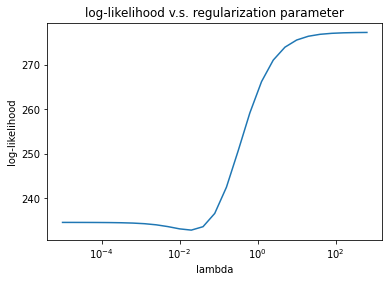

In [9]:
fig, ax = plt.subplots()
ax.plot(l2_param, log_lh)
ax.set_xscale('log')
ax.set_xlabel('lambda')
ax.set_ylabel('log-likelihood')
ax.set_title('log-likelihood v.s. regularization parameter')

In [10]:
ind = int(np.where(log_lh == np.min(log_lh))[0])
print("min log-likelihood = {} and lambda = {}".format(log_lh[ind], l2_param[ind]))

min log-likelihood = 232.8744022310788 and lambda = 0.019952623149688705


**Problem 8**

In [7]:
f_x = np.linspace(0, 1, 10)
#f_x = f_x[1:len(f_x)-1]
tol = 0.1
lamda = 0.02 # the best lambda we found in the previous problem

opt_theta = fit_logistic_reg(X_train, y_train, f_objective, lamda)

In [8]:
def pred_prob(theta, X):
    '''
    Args:
        theta: 1D numpy array of size num_features
        X: 2D numpy array of size (num_instances, num_features)

    Returns:
        result: array of scalar probability of objective function
    '''
    n = X.shape[0]
    result = []
    for i in range(n):
        prob = 1 / (1 + np.exp(-theta.T @ X[i]))
        result.append(prob)
    return np.array(result)

In [9]:
num = []
prob_array = pred_prob(opt_theta, X_val)
for f in f_x:
    ind = np.where(np.abs(prob_array-f)<tol)
    y_pred = y_val[ind[0]]
    n = np.sum([i == 1 for i in y_pred])/len(ind[0])
    num.append(n)

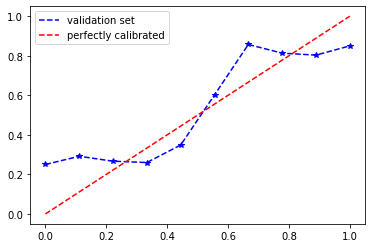

In [114]:
fig, ax = plt.subplots()
ax.plot(f_x, num, '--', label='validation set', color = 'b')
ax.plot(f_x, num, '*', color = 'b')
ax.plot(f_x, f_x, '--', label='perfectly calibrated', color = 'r')
ax.legend(loc='upper left')

If we further shrink each group size, the number of samples in each group becomes too small. The samples seem to be calibrated, but since we do not have a large number of samples, the curve of the validation set fluctuates aroung the perfectly calibrated line. Generally, however, logistic regression tend to give well-calibrated predictions by default, as discussed on the scikit-learns's reference page.

**Problem 9**

By Bayesian Theorem, 
$$p(w|D)=\frac{p(D|w)p(w)}{p(D)}=\frac{e^{-NLL_{D(w)}}p(w)}{p(D)}$$

**Problem 10**

In Bayesian probability theory, if the posterior distributions $p(w|D)$ are in the same probability distribution family as the prior probability distribution $p(w)$, the prior and posterior are conjugate distributions. The prior is then the conjugate prior of the likelihood function $p(D|w)$.

From Bayesian Theorem,
$$p(w|D)=\frac{p(D|w)p(w)}{p(D)}$$
We can calculate the product $p(D|w)p(w)$ and check if the resulting expression can be written in Gaussian form.

The likelihood function of logistic regression is $p(D|w)=e^{\sum^{n}_{i=1}(log(1+exp(-Y_ix_i^Tw)))}$

$$\begin{split}p(w|D)&=\frac{1}{\sqrt{(2\pi)^k|\Sigma|}}\exp{(-\frac{1}{2}(w-\mu)^T\Sigma^{-1}(w-\mu))}\exp{\sum^{n}_{i=1}(log(1+exp(-Y_ix_i^Tw)))}\\&=\frac{1}{\sqrt{(2\pi)^k|\Sigma|}}exp(\sum^{n}_{i=1}(-\frac{1}{2\sigma_i}w^2)+log(1+exp(-Y_ix_i^Tw)))\end{split}$$

This form of expression cannot be written into a gaussian form, and thus this is not a conjugate prior of the likelihood function.

**Problem 11**

$$\begin{split}-log(p(w|D))&=NLL_{D(w)}-logD(w)+c\\&=n\hat{R_n}(w)-log(\frac{1}{\sqrt{(2\pi)^k|\Sigma|}})+\frac{1}{2}(w-\mu)^T\Sigma^{-1}(w-\mu)+c\\&=n\hat{R_n}(w)+\frac{1}{2}w^T\Sigma^{-1}w+c\end{split}$$

Note we have $w~N(0,\Sigma)$ and $c$ represents an arbitrary constant.

Since we need to find a covariance matrix $\Sigma$ such that the MAP estimate for $w$ after observing data $D$ is the same as the minimizer of the regularized logistic regression function, we need to have
$$min(-log(p(w|D)))=min(J_{logistic}(w))$$

Therefore, suppose $w$ is the solution we need to have
$$n\hat{R_n}(w)+\frac{1}{2}w^T\Sigma^{-1}w+c=n\hat{R_n}(w)+\lambda n||w||^2$$

This will give $\Sigma=\frac{1}{2n\lambda}I$

**Problem 12**

In order to have, $$\begin{split}min(-log(p(w|D)))&=min(J_{logistic}(w))\\n\hat{R_n}(w)+\frac{1}{2}w^T\Sigma^{-1}w+c&=n\hat{R_n}(w)+\lambda n||w||^2\\n\hat{R_n}(w)+\frac{1}{2}w^Tw+c&=n\hat{R_n}(w)+\lambda n||w||^2\end{split}$$

We need to choose $\lambda=\frac{1}{2n}$

# Coin Flipping with Partial Observability

**Problem 13**

By Bayes Theorem,
$$\begin{split}
p(x=H|\theta_1,\theta_2)
&=\frac{p(x=H,\theta_1,\theta_2)}{p(\theta_1,\theta_2)}\\
&=\frac{p(x=H|Z=H,\theta_1,\theta_2)p(Z=H,\theta_1,\theta_2)+p(x=H|Z=T,\theta_1,\theta_2)p(Z=T,\theta_1,\theta_2)}{p(\theta_1,\theta_2)}\\
&=\frac{p(x=H|Z=H,\theta_1,\theta_2)p(Z=H|\theta_1,\theta_2)p(\theta_1,\theta_2)}{p(\theta_1,\theta_2)}\\
&=p(x=H|Z=H,\theta_1,\theta_2)p(Z=H|\theta_1,\theta_2)\\
&=p(x=H|Z=H,\theta_2)p(Z=H|\theta_1)\\
&=\theta_1\theta_2\end{split}$$

**Problem 14**

$$\begin{split}L{(D_r|\theta_1,\theta_2)}&=(\theta_1\theta_2)^{n_h}(1-\theta_1\theta_2)^{n_t}\\log(L{(D_r|\theta_1,\theta_2)})&=n_hlog(\theta_1\theta_2)+n_tlog(1-\theta_1\theta_2)\end{split}$$

**Problem 15**

To find the maximum likelihood, since the function is concave, we can take the derivative with respect to $\theta_1$ or $\theta_2$ and then set it to 0. For calculation convinence we can use log likelihood.

$$\begin{split}\frac{\partial log(L{(D_r|\theta_1,\theta_2)})}{\partial\theta_1}&=\frac{\partial(n_hlog(\theta_1\theta_2)+n_tlog(1-\theta_1\theta_2))}{\partial \theta_1}\\&=\frac{n_h\theta_2}{\theta_1\theta_2}+\frac{-n_t\theta_2}{1-\theta_1\theta_2}\\&=0\end{split}$$

From the above equation we can get $$\theta_1\theta_2=\frac{n_h}{n_h+n_t}$$

We can get a similar expression if we take derivative with respect to $\theta_2$. We can get an equation of the product of $\theta_1\theta_2$, but we cannot estimate $\theta_1$ and $\theta_2$ separately. We need extra dataset to estimate the 2 variables.

**Problem 16**

$$\begin{split}L(\theta_1,\theta_2)&=p(D_r,D_c|\theta_1,\theta_2)\\&=p(D_c|\theta_1)p(D_r|\theta_1\theta_2)\\&=\theta_1^{c_h}(1-\theta_1)^{c_t}(\theta_1\theta_2)^{n_h}(1-\theta_1\theta_2)^{n_t}\end{split}$$

We can get the log-likelihood of this expression
$$logL(\theta_1,\theta_2)=c_hlog(\theta_1)+c_tlog(1-\theta_1)+n_hlog(\theta_1\theta_2)+n_tlog(1-\theta_1\theta_2)$$

Then we can take the derivative and set it to 0
$$\begin{split}\frac{\partial logL(\theta_1,\theta_2)}{\partial\theta_1}&=\frac{c_h}{\theta_1}-\frac{c_t}{1-\theta_1}+\frac{n_h\theta_2}{\theta_1\theta_2}-\frac{n_t\theta_2}{1-\theta_1\theta_2}\\&=\frac{c_h+n_h}{\theta_1}-\frac{c_t}{1-\theta_1}-\frac{n_t\theta_2}{1-\theta_1\theta_2}\\&=0\end{split}$$

$$\begin{split}\frac{\partial logL(\theta_1,\theta_2)}{\partial\theta_2}&=\frac{n_h\theta_1}{\theta_1\theta_2}-\frac{n_t\theta_1}{1-\theta_1\theta_2}&=\frac{n_h}{\theta_2}-\frac{n_t\theta_1}{1-\theta_1\theta_2}&=0\end{split}$$

Thus we have a system of 2 different equations
$$\begin{equation}
  \begin{cases}
    \frac{c_h+n_h}{\theta_1}-\frac{c_t}{1-\theta_1}-\frac{n_t\theta_2}{1-\theta_1\theta_2}=0\\
    \theta_1=\frac{n_h}{(n_h+n_t)\theta_2}
  \end{cases}
\end{equation}$$

After solving the system of equations, we can have the MLE estimate of $\theta_1$ and $\theta_2$
$$\begin{equation}
  \begin{cases}
    \theta_2=\frac{n_h(c_h+c_t)}{(n_h+n_t)c_h}\\
    \theta_1=\frac{c_h}{(c_h+c_t)}
  \end{cases}
\end{equation}$$

**Problem 17**

Set $D=D_r\cup D_c$, and we can have $$\begin{split}p(\theta_1,\theta_2|D)&=\frac{p(D|\theta_1,\theta_2)p(\theta_1,\theta_2)}{\int_Dp(\theta_1,\theta_2,D)\,dx}\\&\propto(\theta_1\theta_2)^{n_h}(1-\theta_1\theta_2)^{n_t}\theta_1^{c_h}(1-\theta_1)^{c_t}\frac{\Gamma(h+t)}{\Gamma(h)\Gamma(t)}\theta_1^{h-1}(1-\theta_1)^{t-1}\\&\propto\theta_1^{n_h+h-1+c_h}(1-\theta_1)^{c_t+t-1}\theta_2^{n_h}(1-\theta_1\theta_2)^{n_t}\end{split}$$

We can then take the log of the expression,
$$log(p(\theta_1,\theta_2|D))=(n_h+h-1+c_h)log\theta_1+(c_t+t-1)log(1-\theta_1)+n_hlog\theta_2+n_tlog(1-\theta_1\theta_2)+c$$

Then take the derivative with respect to $\theta_1$ and $\theta_2$ and set to 0,
$$\frac{\partial log(p(\theta_1,\theta_2|D))}{\partial\theta_1}=\frac{(n_h+h-1+c_h)}{\theta_1}+\frac{-(c_t+t-1)}{1-\theta_1}+\frac{-n_t\theta_2}{1-\theta_1\theta_2}=0$$
$$\frac{\partial log(p(\theta_1,\theta_2|D))}{\partial\theta_2}=\frac{n_h}{\theta_2}+\frac{-n_t\theta_1}{1-\theta_1\theta_2}=0$$

Then we have 2 equations,
$$\begin{equation}
  \begin{cases}
    \frac{(n_h+h-1+c_h)}{\theta_1}+\frac{-(c_t+t-1)}{1-\theta_1}+\frac{-n_t\theta_2}{1-\theta_1\theta_2}=0\\
    \theta_1=\frac{n_h}{(n_h+n_t)\theta_2}
  \end{cases}
\end{equation}$$

We can solve this system of 2 equations to get
$$\begin{equation}
  \begin{cases}
    \theta_1=\frac{h-1+c_h}{h+c_h+c_t+t-2}\\
    \theta_2=\frac{n_h(h+c_h+t+c_t-2)}{(n_h+n_t)(h+c_h-1)}
  \end{cases}
\end{equation}$$